In [33]:
!pip install circlify

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
import circlify as circ
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [36]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

In [3]:
outPath = "figures"

In [4]:
pd_table1 = pd.read_csv("data/Table_4.csv")

# Task

In [30]:
df = pd_table1.copy()

df["Task"] = df["Task"].str.split(", ")
df["Task"][-20:]
df = df["Task"].explode()

vals = (df.value_counts() / df.value_counts().sum())*100
vals

Task
classification (supervised)    46.0
clustering (unsupervised)      38.0
regression (supervised)        16.0
Name: count, dtype: float64

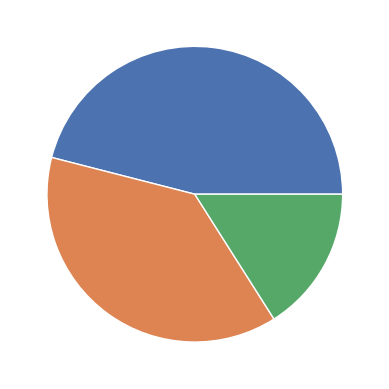

In [32]:
fig, ax = plt.subplots()
ax.pie(vals)
plt.show()

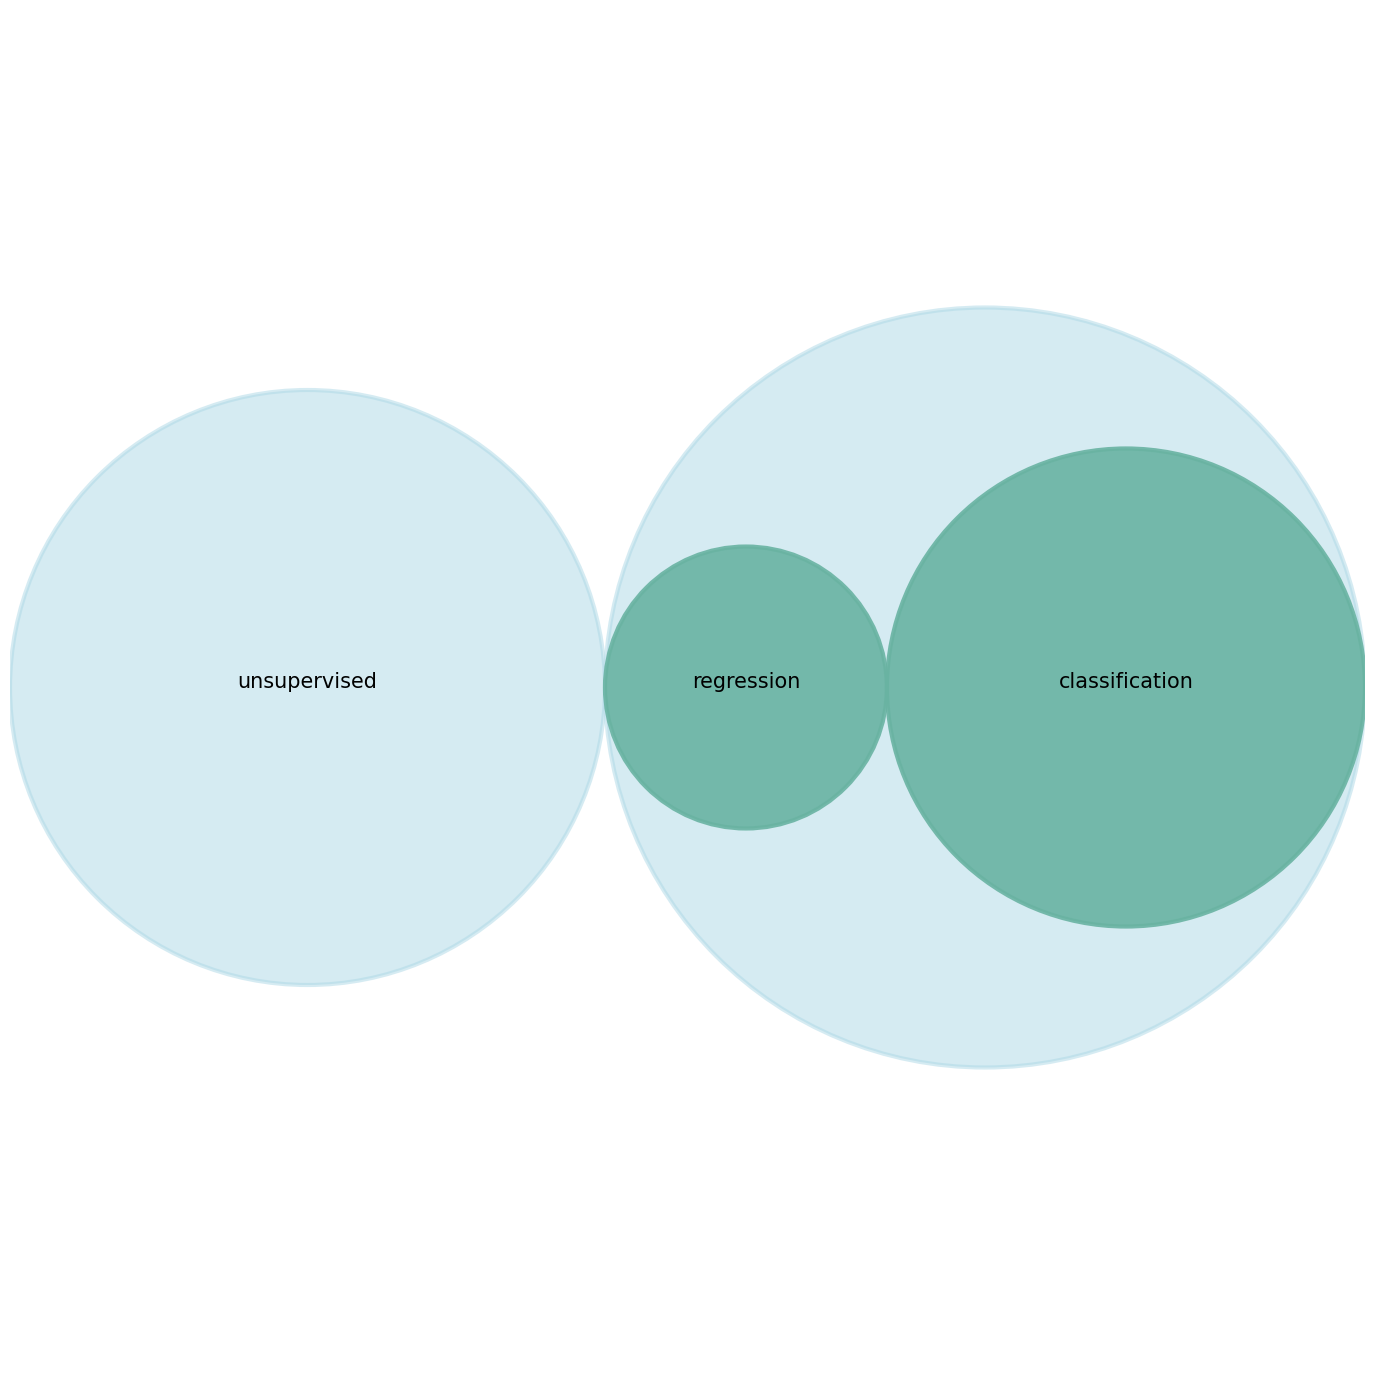

In [120]:
data = [
       {'id': 'supervised', 'datum': 0.62, 'children': [{'id': 'classification', 'datum': 0.46},
                                                        {'id': 'regression', 'datum': 0.16}]},
       {'id': 'unsupervised', 'datum': 0.38},
    ]
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 1:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=3, color="lightblue"))

    label = circle.ex["id"]
    if label == "unsupervised":
        plt.annotate(label, (x,y), ha='center', color="black")

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.9, linewidth=3, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="black")

plt.tight_layout()
plt.savefig(f"{outPath}/circlify_task.svg", dpi=300)



# Field

In [160]:
df = pd_table1.copy()

df["Applications to"] = df["Applications to"].str.split(", ")
df = df["Applications to"].explode()

vals = (df.value_counts() / df.value_counts().sum())*100
vals

all_labels = []
for i, val in enumerate(vals):
    label_i = f"{vals.index[i]} ({round(val,1)}%)"
    all_labels.append(label_i)

/tmp/ipykernel_7096/2980166305.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches,


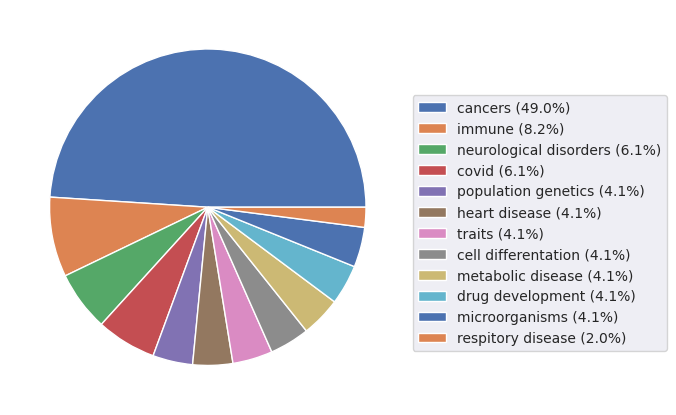

In [172]:
fig, ax = plt.subplots(figsize=(7,7))

patches, _  = ax.pie(vals)
ax.legend(patches, 
          labels=all_labels, 
           bbox_to_anchor=(1, 0.8), fontsize=10)

plt.tight_layout()
plt.savefig(f"{outPath}/applications.svg", dpi=300)

/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


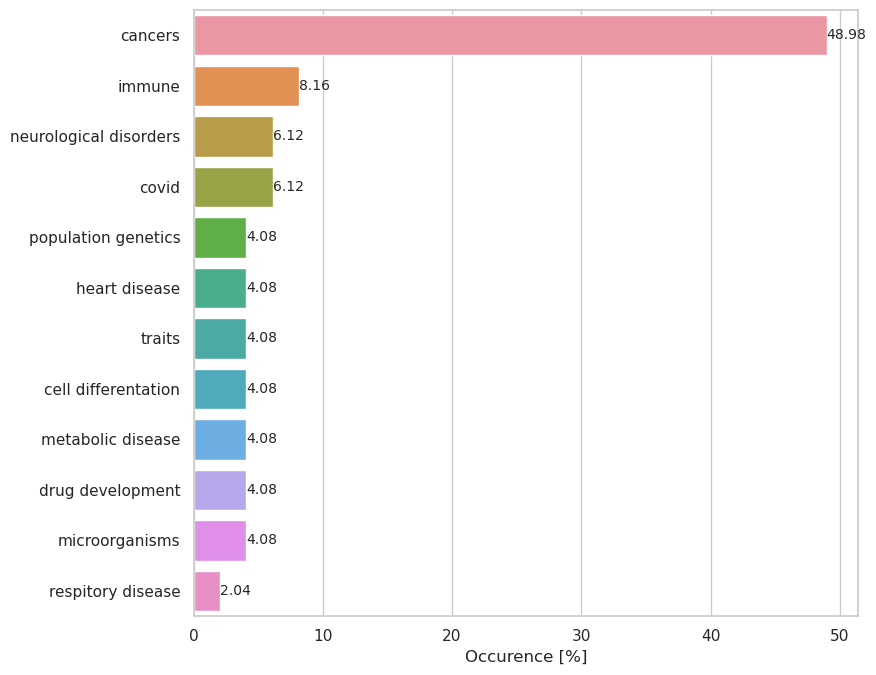

In [198]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(9,7))

a = pd.DataFrame(vals)
a["application"] = vals.index
a["count"] = round(a["count"],2)

ax = sns.barplot(data = a, y="application", x="count", orient="h")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylabel("")
ax.set_xlabel("Occurence [%]")
plt.tight_layout()
plt.savefig(f"{outPath}/applications_bar.svg", dpi=300)

,count,application
Applications to,,
cancers,48.979592,cancers
immune,8.163265,immune
neurological disorders,6.122449,neurological disorders
covid,6.122449,covid
population genetics,4.081633,population genetics
heart disease,4.081633,heart disease
traits,4.081633,traits
cell differentation,4.081633,cell differentation
metabolic disease,4.081633,metabolic disease
